# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [2]:
# Import warnings
import warnings


In [3]:
# Import the libraries you will be using for analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.20.1
pandas version: 1.2.4
matplotlib version: 3.7.5
seaborn version: 0.11.1


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [5]:
# Try loading one file

df = pd.read_parquet('2023-1.parquet')
df.info()

# df = pd.read_parquet('2023-1.parquet')
# df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload
sample = df.sample(frac = 0.05, random_state = 42)
sample.info()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
folder_path = 'Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records'

# Create a list of all the twelve files to read
file_list = [fi for fi in os.listdir(folder_path)]

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        print(f"Reading file {file_name}")
        # file path for the current file
        file_path = os.path.join(folder_path, file_name)

        # Reading the current file
        df_temp = pd.read_parquet(file_path)


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for day in df_temp['tpep_pickup_datetime'].dt.date.unique():
            day_data = df_temp[df_temp['tpep_pickup_datetime'].dt.date == day]
            # Iterate through each hour of the selected date
            for hour in df_temp['tpep_pickup_datetime'].dt.hour.unique():
                hour_data = day_data[day_data['tpep_pickup_datetime'].dt.hour == hour]
            
                # Sample 5% of the hourly data randomly
                current_hour_data = hour_data.sample(frac = 0.05,random_state = 42)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, current_hour_data], ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)

    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [1]:
# Store the df in csv/parquet
df.to_parquet('Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023_data.parquet')

NameError: name 'df' is not defined

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [4]:
# Load the new data file
df = pd.read_parquet("Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records/2023_data.parquet")

In [5]:
df.shape

(1896400, 20)

In [6]:
# df.head()
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15              1.0   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46              2.0   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36              3.0   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55              1.0   
4         2  2023-01-01 00:43:00   2023-01-01 01:01:00              NaN   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           7.74         1.0                  N           138           256   
1           1.24         1.0                  N           161           237   
2           1.44         1.0                  N           237           141   
3           0.54         1.0                  N           143           142   
4          19.24         NaN               None            66           107   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             2        32.40    6.0      0.5        0.00           0.0   
1             1         7.90    1.0      0.5        2.58           0.0   
2             2        11.40    1.0      0.5        0.00           0.0   
3             2         6.50    1.0      0.5        0.00           0.0   
4             0        25.64    0.0      0.5        5.93           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         41.15                   0.0         1.25   
1                    1.0         15.48                   2.5         0.00   
2                    1.0         16.40                   2.5         0.00   
3                    1.0         11.50                   2.5         0.00   
4                    1.0         35.57                   NaN          NaN   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [7]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [8]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df = df.drop('store_and_fwd_flag', axis=1) #removing store_and_fwd_flag as it is not required in my analysis
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1896400 entries, 0 to 1896399
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
 18  Airport_fee           

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [9]:
df.isnull().sum()

VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            64874
trip_distance                  0
RatecodeID                 64874
PULocationID                   0
DOLocationID                   0
payment_type                   0
fare_amount                    0
extra                          0
mta_tax                        0
tip_amount                     0
tolls_amount                   0
improvement_surcharge          0
total_amount                   0
congestion_surcharge       64874
airport_fee              1747917
Airport_fee               213357
dtype: int64

In [10]:
# Combine the two airport fee columns
df.airport_fee = df.airport_fee.fillna(df.Airport_fee)
df.drop('Airport_fee', axis=1, inplace=True)


In [11]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          64874
trip_distance                0
RatecodeID               64874
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     64874
airport_fee              64874
dtype: int64

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [12]:
# check where values of fare amount are negative
df[df['fare_amount']<0] # no negative value found for fare amount


Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [13]:
# Analyse RatecodeID for the negative fare amounts
# no negative value for fare amount is found, hence the data frame is empty


In [14]:
# Find which columns have negative values
def neg_col_check(s):
    if s.dtype in ['int64', 'float64']:
        if (s < 0).any():
            return s.name  
m = list(filter(None, map(neg_col_check, [df[col] for col in df.columns])))
print(m)

['extra', 'mta_tax', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [15]:
# fix these negative values
print(df[df['extra']<0]['extra'].unique())
print(df[df['mta_tax']<0]['mta_tax'].unique())
print(df[df['improvement_surcharge']<0]['improvement_surcharge'].unique())
print(df[df['total_amount']<0]['total_amount'].unique())
print(df[df['congestion_surcharge']<0]['congestion_surcharge'].unique())
print(df[df['airport_fee']<0]['airport_fee'].unique())


[-1.  -2.5]
[-0.5]
[-1.]
[-1.   -5.25 -4.   -1.5  -5.   -3.25 -2.75 -5.75 -3.5 ]
[-2.5]
[-1.25 -1.75]


In [16]:
print(df[df['extra']<0]['VendorID'].count())
print(df[df['mta_tax']<0]['VendorID'].count())
print(df[df['improvement_surcharge']<0]['VendorID'].count())
print(df[df['total_amount']<0]['VendorID'].count())
print(df[df['congestion_surcharge']<0]['VendorID'].count())
print(df[df['airport_fee']<0]['VendorID'].count())

3
73
78
78
56
15


In [17]:
df = df[df['total_amount'] >= 0] # since there are too less values that are negative, so removing them

In [18]:
print(df[df['extra']<0]['VendorID'].count())
print(df[df['mta_tax']<0]['VendorID'].count())
print(df[df['improvement_surcharge']<0]['VendorID'].count())
print(df[df['total_amount']<0]['VendorID'].count())
print(df[df['congestion_surcharge']<0]['VendorID'].count())
print(df[df['airport_fee']<0]['VendorID'].count())

1
0
0
0
0
0


In [19]:
df = df[df['extra'] >= 0]

In [20]:
print(df[df['extra']<0]['VendorID'].count())
print(df[df['mta_tax']<0]['VendorID'].count())
print(df[df['improvement_surcharge']<0]['VendorID'].count())
print(df[df['total_amount']<0]['VendorID'].count())
print(df[df['congestion_surcharge']<0]['VendorID'].count())
print(df[df['airport_fee']<0]['VendorID'].count())

0
0
0
0
0
0


In [21]:
# Handling Passenger_count missing values
df['passenger_count'].value_counts(normalize=True) * 100

passenger_count
1.0    75.195624
2.0    15.140105
3.0     3.769260
4.0     2.103910
0.0     1.620631
5.0     1.303396
6.0     0.865927
8.0     0.000601
7.0     0.000273
9.0     0.000273
Name: proportion, dtype: float64

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [22]:
# Find the proportion of missing values in each column
(df.isnull().mean() * 100).round(2)


VendorID                 0.00
tpep_pickup_datetime     0.00
tpep_dropoff_datetime    0.00
passenger_count          3.42
trip_distance            0.00
RatecodeID               3.42
PULocationID             0.00
DOLocationID             0.00
payment_type             0.00
fare_amount              0.00
extra                    0.00
mta_tax                  0.00
tip_amount               0.00
tolls_amount             0.00
improvement_surcharge    0.00
total_amount             0.00
congestion_surcharge     3.42
airport_fee              3.42
dtype: float64

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [23]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
df['passenger_count'].value_counts(normalize=True) * 100


passenger_count
1.0    75.195624
2.0    15.140105
3.0     3.769260
4.0     2.103910
0.0     1.620631
5.0     1.303396
6.0     0.865927
8.0     0.000601
7.0     0.000273
9.0     0.000273
Name: proportion, dtype: float64

In [24]:
df.passenger_count = df.passenger_count.fillna(1.0)
(df.isnull().mean() * 100).round(2)

VendorID                 0.00
tpep_pickup_datetime     0.00
tpep_dropoff_datetime    0.00
passenger_count          0.00
trip_distance            0.00
RatecodeID               3.42
PULocationID             0.00
DOLocationID             0.00
payment_type             0.00
fare_amount              0.00
extra                    0.00
mta_tax                  0.00
tip_amount               0.00
tolls_amount             0.00
improvement_surcharge    0.00
total_amount             0.00
congestion_surcharge     3.42
airport_fee              3.42
dtype: float64

Did you find zeroes in passenger_count? Handle these.

In [25]:
print(df[df['passenger_count'] == 0]['passenger_count'].count())

29681


In [26]:
#replacing 0's in passenger_count
df['passenger_count'] = df['passenger_count'].replace(0, 1)
print(df[df['passenger_count'] == 0]['passenger_count'].count())

0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [27]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].value_counts(normalize=True) * 100

RatecodeID
1.0     94.417638
2.0      3.911989
99.0     0.571788
5.0      0.560868
3.0      0.334326
4.0      0.203227
6.0      0.000164
Name: proportion, dtype: float64

In [28]:
# Fix missing values in 'RatecodeID'
null_index_values = df[df['RatecodeID'].isnull()].index 
total_null_count = len(null_index_values)
values = int(0.95 * total_null_count) #randomly selected 95% of missing values to fill by 1
values_filled = np.random.choice(null_index_values, values, replace=False)
df.loc[values_filled, 'RatecodeID'] = 1


In [29]:
df.RatecodeID = df.RatecodeID.fillna(2.0) # filled remaining values by 2
(df.isnull().mean() * 100).round(2)

VendorID                 0.00
tpep_pickup_datetime     0.00
tpep_dropoff_datetime    0.00
passenger_count          0.00
trip_distance            0.00
RatecodeID               0.00
PULocationID             0.00
DOLocationID             0.00
payment_type             0.00
fare_amount              0.00
extra                    0.00
mta_tax                  0.00
tip_amount               0.00
tolls_amount             0.00
improvement_surcharge    0.00
total_amount             0.00
congestion_surcharge     3.42
airport_fee              3.42
dtype: float64

**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [30]:
# handle null values in congestion_surcharge
df['amount_diff'] = df['total_amount'] - (df['fare_amount'] + df['extra'] + df['mta_tax'] + df['tip_amount'] + df['tolls_amount'] + df['improvement_surcharge'])
df['amount_diff'] = df['amount_diff'].round(2) # created a column containing sum of all amounts before total amount, to calculate the difference.
df['amount_diff'].value_counts()

amount_diff
 2.50    1235096
 0.00     531922
 4.25      54195
 1.75      42072
 3.75      16716
 1.25      13845
 5.00       1667
 4.50        669
-0.30         55
 4.45         40
 2.00         35
 1.95          7
 0.50          1
 3.00          1
Name: count, dtype: int64

In [31]:
df.loc[(df['amount_diff'] == 2.5) & (df['congestion_surcharge'].isnull()), 'congestion_surcharge'] = 2.5
df.loc[(df['amount_diff'] == 0) & (df['congestion_surcharge'].isnull()), 'congestion_surcharge'] = 0
df = df[df['congestion_surcharge'].notnull()]
(df.isnull().mean() * 100).round(2)


VendorID                 0.00
tpep_pickup_datetime     0.00
tpep_dropoff_datetime    0.00
passenger_count          0.00
trip_distance            0.00
RatecodeID               0.00
PULocationID             0.00
DOLocationID             0.00
payment_type             0.00
fare_amount              0.00
extra                    0.00
mta_tax                  0.00
tip_amount               0.00
tolls_amount             0.00
improvement_surcharge    0.00
total_amount             0.00
congestion_surcharge     0.00
airport_fee              3.39
amount_diff              0.00
dtype: float64

Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [32]:
# Handle any remaining missing values
# handling missing values in airport_fee
df['airport_fee'].value_counts(normalize=True) * 100


airport_fee
0.00    91.212031
1.75     6.613514
1.25     2.174401
1.00     0.000055
Name: proportion, dtype: float64

In [33]:
df[df.airport_fee==1.25]['PULocationID'].nunique() # many values are there, so replacing all with 0 irrespective of pickup location.

88

In [34]:
df['PULocationID'].nunique()

258

In [35]:
df.airport_fee = df.airport_fee.fillna(0)
(df.isnull().mean() * 100).round(2)

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
amount_diff              0.0
dtype: float64

In [36]:
df = df.drop('amount_diff',axis = 1)

In [37]:
(df.isnull().mean() * 100).round(2)

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
dtype: float64

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1895616 entries, 0 to 1896399
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
dtypes: datetime64[ns](2), float

In [39]:
# converting vendorid, passenger_count, ratecodeid, payment_type to int

df['VendorID'] = df['VendorID'].astype(int)
df['passenger_count'] = df['passenger_count'].astype(int)
df['RatecodeID'] = df['RatecodeID'].astype(int)
df['payment_type'] = df['payment_type'].astype(int)

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1895616 entries, 0 to 1896399
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        int64         
 4   trip_distance          float64       
 5   RatecodeID             int64         
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  airport_fee            float64       
dtypes: datetime64[ns](2), float

In [41]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe()


VendorID           tpep_pickup_datetime  \
count  1.895616e+06                        1895616   
mean   1.733287e+00  2023-07-02 20:04:07.541633536   
min    1.000000e+00            2022-12-31 23:51:30   
25%    1.000000e+00  2023-04-02 16:11:16.750000128   
50%    2.000000e+00     2023-06-27 15:48:22.500000   
75%    2.000000e+00  2023-10-06 19:42:17.249999872   
max    6.000000e+00            2023-12-31 23:57:51   
std    4.475063e-01                            NaN   

               tpep_dropoff_datetime  passenger_count  trip_distance  \
count                        1895616     1.895616e+06   1.895616e+06   
mean   2023-07-02 20:21:33.404164864     1.372369e+00   3.859671e+00   
min              2022-12-31 23:56:06     1.000000e+00   0.000000e+00   
25%              2023-04-02 16:29:57     1.000000e+00   1.050000e+00   
50%              2023-06-27 16:08:46     1.000000e+00   1.800000e+00   
75%              2023-10-06 19:59:38     1.000000e+00   3.400000e+00   
max              2024-01-01 20:50:55     9.000000e+00   1.263605e+05   
std                              NaN     8.645298e-01   1.294352e+02   

         RatecodeID  PULocationID  DOLocationID  payment_type   fare_amount  \
count  1.895616e+06  1.895616e+06  1.895616e+06  1.895616e+06  1.895616e+06   
mean   1.614907e+00  1.652857e+02  1.640531e+02  1.164213e+00  1.991819e+01   
min    1.000000e+00  1.000000e+00  1.000000e+00  0.000000e+00  0.000000e+00   
25%    1.000000e+00  1.320000e+02  1.140000e+02  1.000000e+00  9.300000e+00   
50%    1.000000e+00  1.620000e+02  1.620000e+02  1.000000e+00  1.350000e+01   
75%    1.000000e+00  2.340000e+02  2.340000e+02  1.000000e+00  2.190000e+01   
max    9.900000e+01  2.650000e+02  2.650000e+02  4.000000e+00  1.431635e+05   
std    7.268725e+00  6.399660e+01  6.980163e+01  5.077081e-01  1.055582e+02   

              extra       mta_tax    tip_amount  tolls_amount  \
count  1.895616e+06  1.895616e+06  1.895616e+06  1.895616e+06   
mean   1.588330e+00  4.953185e-01  3.546931e+00  5.964558e-01   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    0.000000e+00  5.000000e-01  1.000000e+00  0.000000e+00   
50%    1.000000e+00  5.000000e-01  2.850000e+00  0.000000e+00   
75%    2.500000e+00  5.000000e-01  4.420000e+00  0.000000e+00   
max    1.425000e+01  4.000000e+00  2.230800e+02  1.430000e+02   
std    1.829304e+00  4.845733e-02  4.055047e+00  2.187666e+00   

       improvement_surcharge  total_amount  congestion_surcharge   airport_fee  
count           1.895616e+06  1.895616e+06          1.895616e+06  1.895616e+06  
mean            9.990541e-01  2.898020e+01          2.305889e+00  1.380791e-01  
min             0.000000e+00  0.000000e+00          0.000000e+00  0.000000e+00  
25%             1.000000e+00  1.596000e+01          2.500000e+00  0.000000e+00  
50%             1.000000e+00  2.100000e+01          2.500000e+00  0.000000e+00  
75%             1.000000e+00  3.093000e+01          2.500000e+00  0.000000e+00  
max             1.000000e+00  1.431675e+05          2.500000e+00  1.750000e+00  
std             2.833535e-02  1.064370e+02          6.690274e-01  4.576487e-01

In [42]:
df.VendorID.unique() # In the data dictionary, only 1 and 2 are mentioned as valid vendor, hence 6 is an outlier.

array([2, 1, 6])

In [43]:
df.passenger_count.unique() # it should contain values till 6 only, hence other values above 6 are outliers.

array([1, 2, 3, 4, 6, 5, 8, 7, 9])

In [44]:
df.RatecodeID.unique() # 99 is an outlier

array([ 1,  2,  4,  5, 99,  3,  6])

In [45]:
# checking for outliers for total amount
Q1 = np.percentile(df.total_amount,1)
Q3 = np.percentile(df.total_amount,99)
IQR = Q3-Q1
lower_fence = Q1 - (1.5*IQR)
upper_fence = Q3 + (1.5*IQR)
print(lower_fence,upper_fence)

-134.49 247.35


In [46]:
# checking for outliers for trip_distance
Q1_trip_distance = np.percentile(df.trip_distance,1)
Q3_trip_distance = np.percentile(df.trip_distance,99)
IQR_trip_distance = Q3_trip_distance-Q1_trip_distance
lower_fence_trip_distance = Q1_trip_distance - (1.5*IQR_trip_distance)
upper_fence_trip_distance = Q3_trip_distance + (1.5*IQR_trip_distance)
print(lower_fence_trip_distance,upper_fence_trip_distance)

-30.33 50.55


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [47]:
# remove passenger_count > 6
df = df[df['passenger_count']<7]
df.passenger_count.value_counts()

passenger_count
1    1471018
2     277283
3      69032
4      38532
5      23871
6      15859
Name: count, dtype: int64

In [48]:
# Continue with outlier handling
# removed ratecode == 99
df = df[df['RatecodeID'] != 99]
df.RatecodeID.value_counts()


RatecodeID
1    1790168
2      74856
5      10251
3       6123
4       3722
6          3
Name: count, dtype: int64

In [49]:
# Removing Entries where payment_type is 0 (there is no payment_type 0 defined in the data dictionary)
df.payment_type.value_counts() # payment_Type should not be 0, so removing it 
df = df[df.payment_type != 0]
df.payment_type.value_counts()

payment_type
1    1481890
2     316371
4      13682
3       9011
Name: count, dtype: int64

In [50]:
# Removing Entries where trip_distance is nearly 0 and fare_amount is more than 300
df[(df['fare_amount']>300) & (df['trip_distance']<0.5)]['VendorID'].count()
df = df[(df['fare_amount']<300) & (df['trip_distance']>=0.5)]
df.shape

(1733209, 18)

In [51]:
# Removing Entries where trip_distance is more than 250 miles
df = df[df.trip_distance<250 ]

In [52]:
# Removing Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
df[(df['trip_distance']==0) & (df['fare_amount']==0) & (df['PULocationID'] != df['DOLocationID'])] # no such row exists

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, airport_fee]
Index: []

In [53]:
# Do any columns need standardising?
#removing vendorid  = 6
df = df[df['VendorID'] != 6]
df.VendorID.unique()

array([2, 1])

In [54]:
df.reset_index(drop=True, inplace=True)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15                1   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   
2         2  2023-01-01 00:14:03   2023-01-01 00:24:36                3   
3         2  2023-01-01 00:24:30   2023-01-01 00:29:55                1   
4         1  2023-01-01 00:42:56   2023-01-01 01:16:33                2   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74           1           138           256             2   
1           1.24           1           161           237             1   
2           1.44           1           237           141             2   
3           0.54           1           143           142             2   
4           7.10           1           246            37             1   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0         32.4    6.0      0.5        0.00           0.0   
1          7.9    1.0      0.5        2.58           0.0   
2         11.4    1.0      0.5        0.00           0.0   
3          6.5    1.0      0.5        0.00           0.0   
4         34.5    3.5      0.5        7.90           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                    1.0         41.15                   0.0         1.25  
1                    1.0         15.48                   2.5         0.00  
2                    1.0         16.40                   2.5         0.00  
3                    1.0         11.50                   2.5         0.00  
4                    1.0         47.40                   2.5         0.00

In [55]:
df['mta_tax'].value_counts() # removing rows with values other than 0 or 0.5 
df = df[(df['mta_tax'] < 0.6) & (df['mta_tax'] != 0.3) & (df['mta_tax'] != 0.05)]
df['mta_tax'].value_counts()

mta_tax
0.5    1722829
0.0      10299
Name: count, dtype: int64

In [56]:
df.airport_fee.value_counts() # In the data dictionary the value should either be 0 or 1.25 for specific locations. Therefore removing 1 and 1.75
df = df[(df['airport_fee'] != 1) & (df['airport_fee'] != 1.75)]
df.airport_fee.value_counts()

airport_fee
0.00    1575389
1.25      39056
Name: count, dtype: int64

In [57]:
df.shape

(1614445, 18)

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [58]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`: Categorical
* `tpep_dropoff_datetime`: Categorical
* `passenger_count`: Numerical
* `trip_distance`: Numerical
* `RatecodeID`: Categorical
* `PULocationID`: Numerical
* `DOLocationID`: Numerical
* `payment_type`: Categorical
* `pickup_hour`: Numerical
* `trip_duration`: Numerical



The following monetary parameters belong in the same category, is it categorical or numerical?

Ans - -- These all are numerical

* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

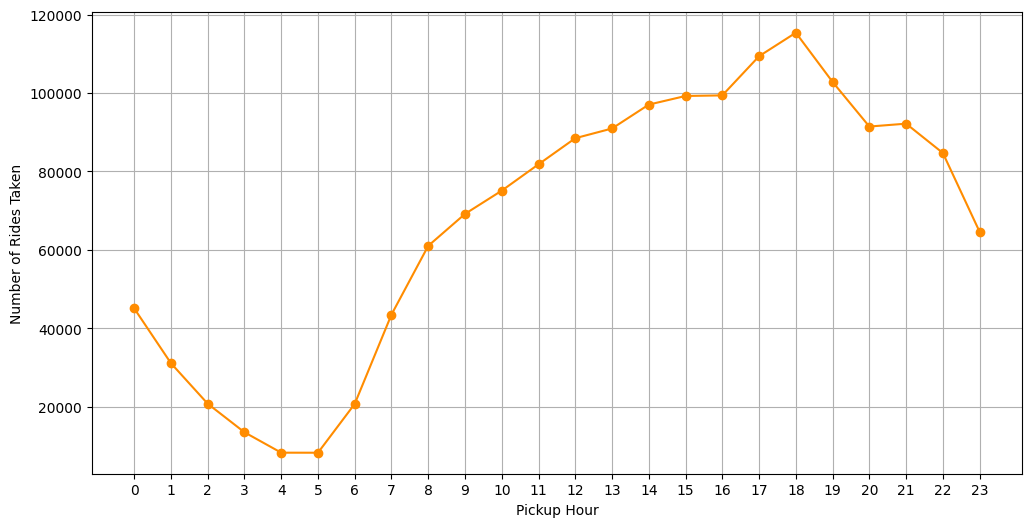

In [59]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df.tpep_pickup_datetime.dt.hour
df1 = df.groupby(by = 'pickup_hour').count()
plt.figure(figsize=(12, 6)) 
plt.plot(df1.index, df1.tpep_pickup_datetime, marker='o', color='darkorange') 
plt.xticks(range(0, 24))  
plt.xlabel("Pickup Hour")
plt.ylabel("Number of Rides Taken")
plt.grid(True)
plt.show()


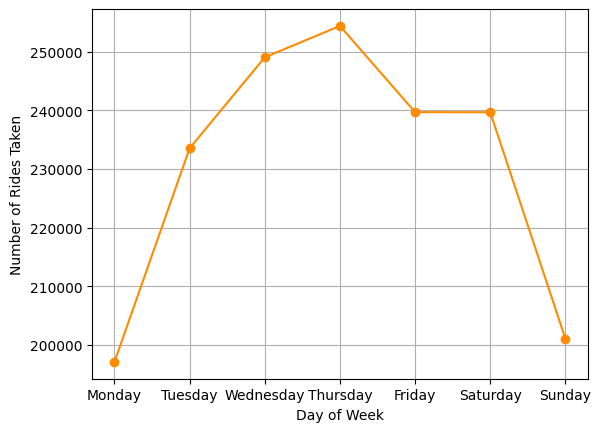

In [60]:
# Find and show the daily trends in taxi pickups (days of the week)
df['Day_of_week'] = df.tpep_pickup_datetime.dt.day_name()
df1 = df.groupby('Day_of_week').count()
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] # sets the order for x labels
df1 = df1.reindex(order)
plt.plot(df1.index, df1.tpep_pickup_datetime, marker='o', color='darkorange')
plt.xlabel("Day of Week")
plt.ylabel("Number of Rides Taken")
plt.grid(True)
plt.show()

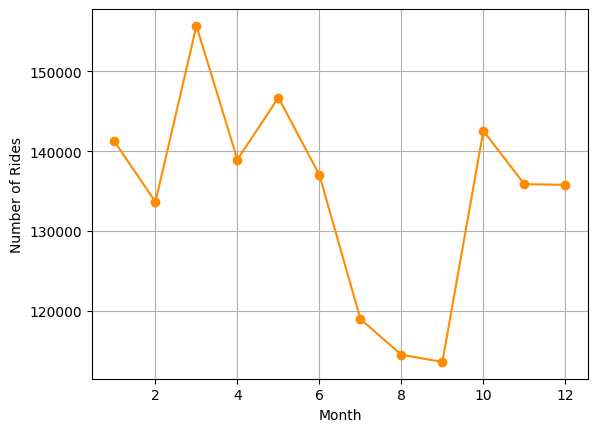

In [61]:
# Show the monthly trends in pickups
df['month'] = df.tpep_pickup_datetime.dt.month
df1 = df.groupby(by = 'month').count()
plt.plot(df1.index, df1.tpep_pickup_datetime, color='darkorange', marker='o')
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.grid(True)
plt.show()


In [62]:
df.head(2)

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:07:18   2023-01-01 00:23:15                1   
1         2  2023-01-01 00:16:41   2023-01-01 00:21:46                2   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           7.74           1           138           256             2   
1           1.24           1           161           237             1   

   fare_amount  ...  mta_tax  tip_amount  tolls_amount  improvement_surcharge  \
0         32.4  ...      0.5        0.00           0.0                    1.0   
1          7.9  ...      0.5        2.58           0.0                    1.0   

   total_amount  congestion_surcharge  airport_fee  pickup_hour  Day_of_week  \
0         41.15                   0.0         1.25            0       Sunday   
1         15.48                   2.5         0.00            0       Sunday   

  month  
0     1  
1     1  

[2 rows x 21 columns]

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [63]:
# Analyse the above parameters
print("checking for 0 values below")
print(df[df['fare_amount']==0]['fare_amount'].count())
print(df[df['tip_amount']==0]['tip_amount'].count())
print(df[df['total_amount']==0]['total_amount'].count())
print(df[df['trip_distance']==0]['trip_distance'].count())
print("checking for neg values below")
print(df[df['fare_amount']<0]['fare_amount'].count())
print(df[df['tip_amount']<0]['tip_amount'].count())
print(df[df['total_amount']<0]['total_amount'].count())
print(df[df['trip_distance']<0]['trip_distance'].count())

checking for 0 values below
151
330820
46
0
checking for neg values below
0
0
0
0


In [64]:
df.shape

(1614445, 21)

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [65]:
# Create a df with non zero entries for the selected parameters.
df = df[df['fare_amount']!=0]
df = df[df['tip_amount']!=0]
df = df[df['total_amount']!=0]
df = df[df['trip_distance']!=0]
df.shape

(1283617, 21)

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

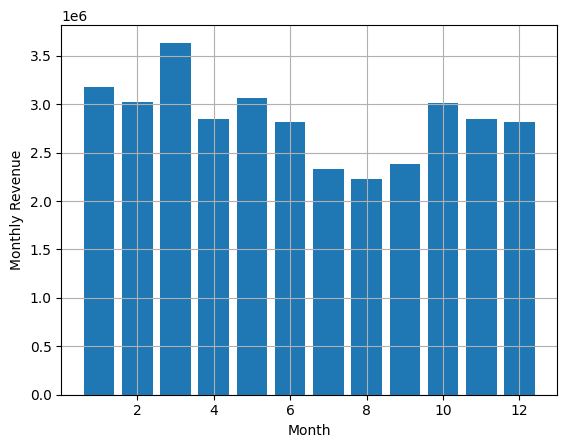

In [66]:
# Group data by month and analyse monthly revenue
df1 = df.groupby(by='month')['total_amount'].sum()
plt.bar(df1.index, df1)
plt.xlabel("Month")
plt.ylabel("Monthly Revenue")
plt.grid(True)
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

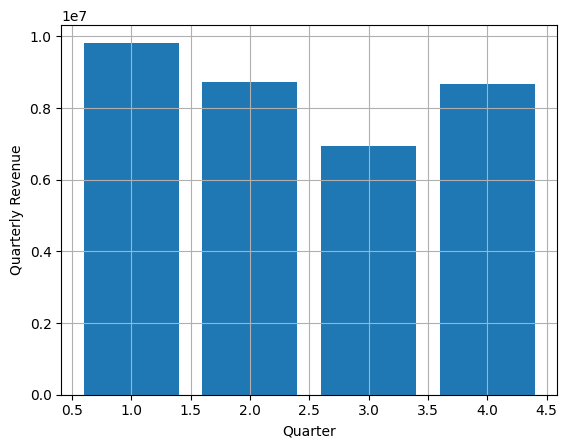

In [67]:
# Calculate proportion of each quarter
df['quarter'] = df.tpep_pickup_datetime.dt.quarter
df1 = df.groupby(by = 'quarter')['total_amount'].sum()
plt.bar(df1.index, df1)
plt.xlabel("Quarter")
plt.ylabel("Quarterly Revenue")
plt.grid(True)
plt.show()

**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

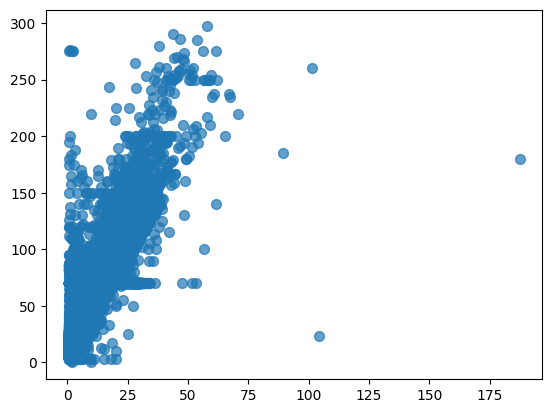

In [68]:
# Show how trip fare is affected by distance
df_3 = df[df['trip_distance'] != 0]
plt.scatter(df_3['trip_distance'], df_3['fare_amount'], alpha=0.7, s=50)
plt.show()


               trip_distance  fare_amount
trip_distance       1.000000     0.944237
fare_amount         0.944237     1.000000


<Axes: >

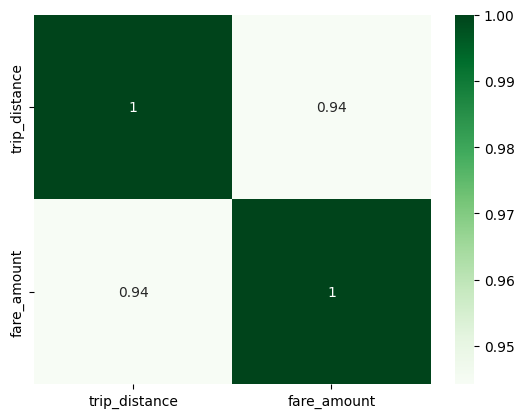

In [69]:
df2 = df_3[['trip_distance', 'fare_amount']].copy()
print(df2.corr())
sns.heatmap(df2.corr(),cmap = 'Greens', annot = True)

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

                     fare_amount  trip_duration_hours
fare_amount             1.000000             0.280614
trip_duration_hours     0.280614             1.000000


<Axes: >

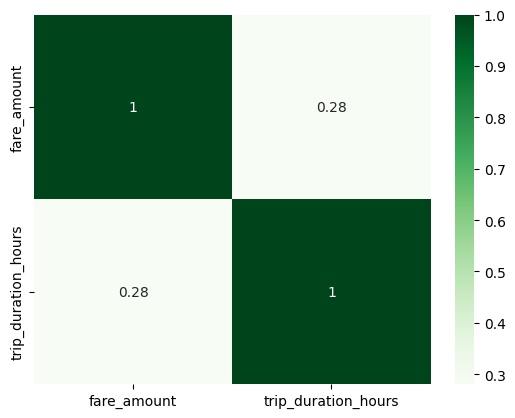

In [70]:
# Show relationship between fare and trip duration
df['trip_duration_hours'] = round((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 3600,3) # created a new col
df[df['trip_duration_hours'] < 0] # checking if there are any negative values
df = df[df['trip_duration_hours'] >= 0]
df3 = df[['fare_amount','trip_duration_hours']].copy()
print(df3.corr())
sns.heatmap(df3.corr(),cmap = 'Greens', annot = True)

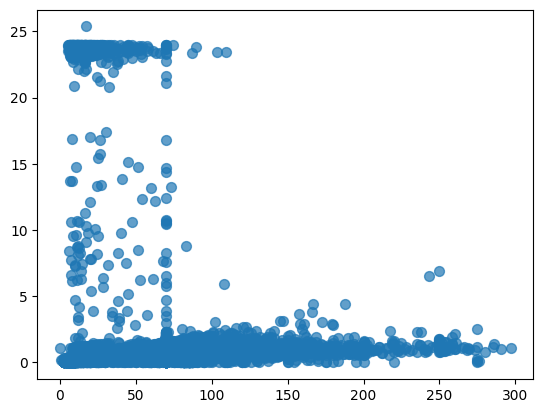

In [71]:
plt.scatter(df3['fare_amount'], df3['trip_duration_hours'], alpha=0.7, s=50)
plt.show()

                 fare_amount  passenger_count
fare_amount          1.00000          0.03331
passenger_count      0.03331          1.00000


<Axes: >

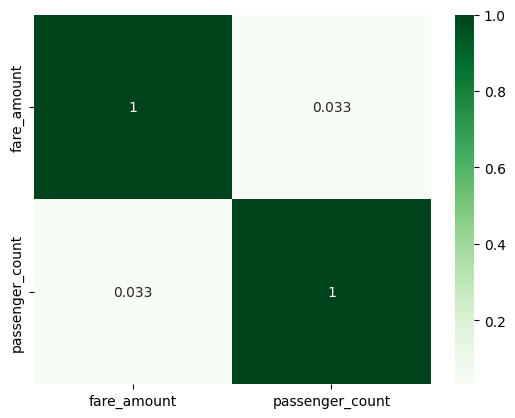

In [72]:
# Show relationship between fare and number of passengers
df3 = df[['fare_amount','passenger_count']].copy()
print(df3.corr())
sns.heatmap(df3.corr(),cmap = 'Greens', annot = True)

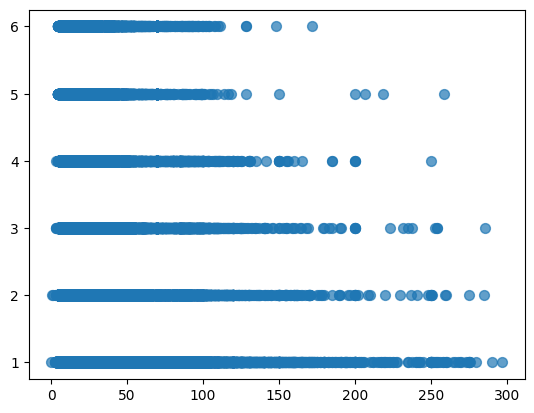

In [73]:
plt.scatter(df3['fare_amount'], df3['passenger_count'], alpha=0.7, s=50)
plt.show()

               trip_distance  tip_amount
trip_distance       1.000000    0.769219
tip_amount          0.769219    1.000000


<Axes: >

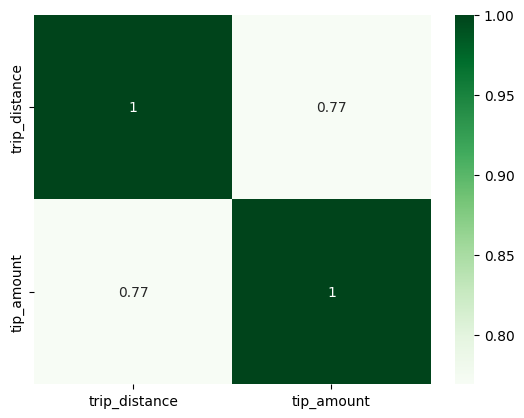

In [74]:
# Show relationship between tip and trip distance
df3 = df[['trip_distance','tip_amount']].copy()
print(df3.corr())
sns.heatmap(df3.corr(),cmap = 'Greens', annot = True)

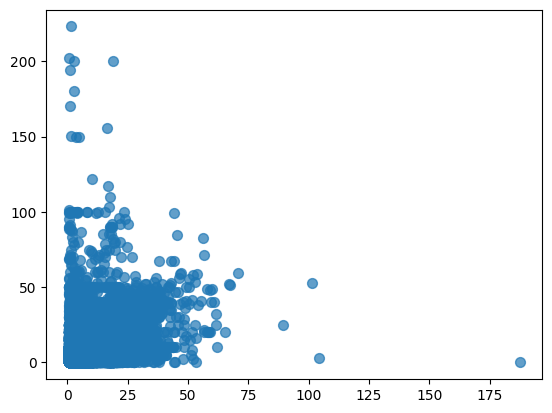

In [75]:
plt.scatter(df3['trip_distance'], df3['tip_amount'], alpha=0.7, s=50)
plt.show()

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

payment_type
1    1283547
2         21
4         12
3          5
Name: count, dtype: int64


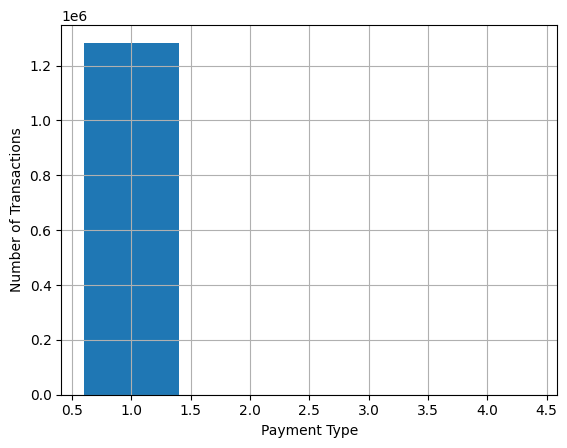

In [76]:
# Analyse the distribution of different payment types (payment_type).
print(df.payment_type.value_counts())
payment_counts = df['payment_type'].value_counts()
plt.bar(payment_counts.index, payment_counts.values)
plt.xlabel('Payment Type')
plt.ylabel('Number of Transactions')
plt.grid(True)
plt.show()




- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [77]:
# !pip install geopandas
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [78]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file(r"Datasets and Dictionary-NYC\Datasets and Dictionary\taxi_zones\taxi_zones.shp") # read the .shp file using gpd
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

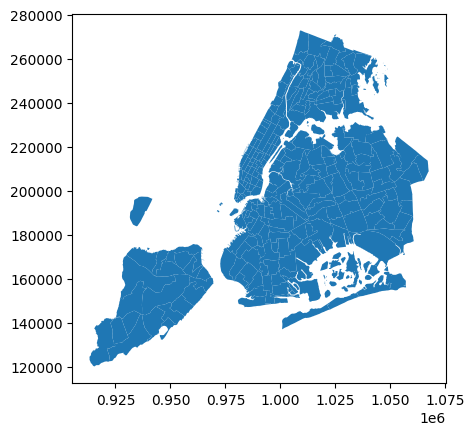

In [79]:
# print(zones.info())
# zones.plot()
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [80]:
# Merge zones and trip records using locationID and PULocationID
df_new = pd.merge(df, zones, how='left', left_on='PULocationID', right_on='LocationID')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [81]:
# Group data by location and calculate the number of trips
trip_count = df['PULocationID'].value_counts().reset_index()


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [82]:
# Merge trip counts back to the zones GeoDataFrame
trip_count.columns = ['LocationID', 'trip_count']
zones = zones.merge(trip_count, how='left', left_on='LocationID', right_on='LocationID')
zones.head()



OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0        18.0  
1         2.0  
2         NaN  
3      1364.0  
4         NaN

In [83]:
zones['trip_count'] = zones['trip_count'].fillna(0).astype(int)
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  
0          18  
1           2  
2           0  
3        1364  
4           0

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

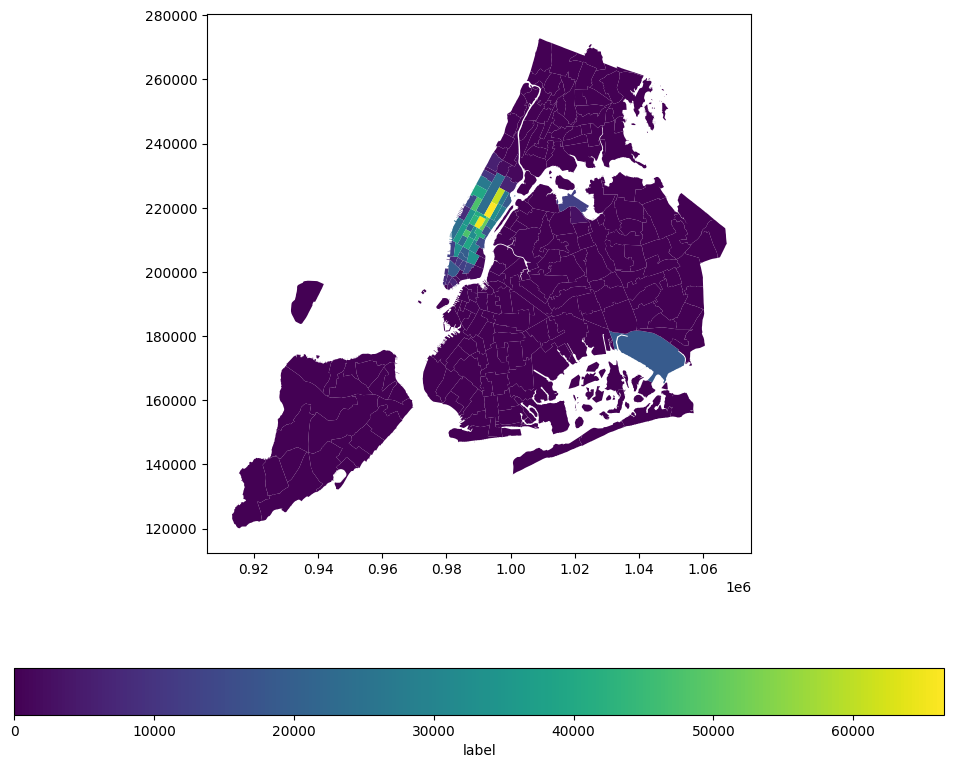

In [84]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

# Plot the map and display it
zones.plot(column = 'trip_count', ax = ax, legend = True, legend_kwds = {'label': "label", 'orientation': "horizontal"})
plt.show()

In [85]:
# can you try displaying the zones DF sorted by the number of trips?
zones.sort_values(by='trip_count').head()


OBJECTID  Shape_Leng  Shape_Area                       zone  LocationID  \
2           3    0.084341    0.000314    Allerton/Pelham Gardens           3   
43         44    0.235689    0.001945     Charleston/Tottenville          44   
57         58    0.059855    0.000205               Country Club          58   
213       214    0.135300    0.000812   South Beach/Dongan Hills         214   
205       206    0.212757    0.000944  Saint George/New Brighton         206   

           borough                                           geometry  \
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
43   Staten Island  POLYGON ((925284.273 142075.259, 924921.951 14...   
57           Bronx  POLYGON ((1035263.069 248349.465, 1035243.096 ...   
213  Staten Island  POLYGON ((960669.201 156319.132, 960902.551 15...   
205  Staten Island  POLYGON ((961436.305 175473.03, 961460.942 175...   

     trip_count  
2             0  
43            0  
57            0  
213           0  
205           0

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [86]:
df = pd.merge(df, zones, how='left', left_on='PULocationID', right_on='LocationID') # merged both the dataframes, df and zones into df
df = df[~(df.zone.isnull())] # removing null values from df
# df.isnull().sum()
df.trip_count = df.trip_count.astype('int32')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1271851 entries, 0 to 1283612
Data columns (total 31 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   VendorID               1271851 non-null  int64         
 1   tpep_pickup_datetime   1271851 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  1271851 non-null  datetime64[ns]
 3   passenger_count        1271851 non-null  int64         
 4   trip_distance          1271851 non-null  float64       
 5   RatecodeID             1271851 non-null  int64         
 6   PULocationID           1271851 non-null  int64         
 7   DOLocationID           1271851 non-null  int64         
 8   payment_type           1271851 non-null  int64         
 9   fare_amount            1271851 non-null  float64       
 10  extra                  1271851 non-null  float64       
 11  mta_tax                1271851 non-null  float64       
 12  tip_amount             1271851 no

In [87]:
# Find routes which have the slowest speeds at different times of the day
df['route'] = df['PULocationID'].astype(str) + ' - ' + df['DOLocationID'].astype(str)
total_distance = df.groupby(['route', 'pickup_hour'])['trip_distance'].sum().reset_index()
avg_duration = df.groupby(['route', 'pickup_hour'])['trip_duration_hours'].mean().reset_index()
route_speed_stats = pd.merge(total_distance, avg_duration, on=['route', 'pickup_hour'])
route_speed_stats['speed'] = route_speed_stats['trip_distance'] / route_speed_stats['trip_duration_hours']
route_speed_stats.head()

route  pickup_hour  trip_distance  trip_duration_hours       speed
0  1 - 1            3           1.00                0.039   25.641026
1  1 - 1            6           2.00                0.096   20.833333
2  1 - 1            7           0.60                0.006  100.000000
3  1 - 1            9           2.11                0.081   26.049383
4  1 - 1           14           2.09                0.074   28.243243

In [88]:
route_speed_stats.sort_values(by = 'speed').head()

route  pickup_hour  trip_distance  trip_duration_hours     speed
34891  162 - 162            4           1.54              23.7730  0.064779
29879   151 - 24            1           1.23              12.0065  0.102445
63412  237 - 238            4           2.85              23.6760  0.120375
41545  170 - 125            2           3.07              23.3330  0.131573
48771   211 - 52           18           3.17              23.8490  0.132920

How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [89]:
# Visualise the number of trips per hour and find the busiest hour
df_trips_per_hour = df.groupby(by = 'pickup_hour')['trip_count'].sum().reset_index()
df_trips_per_hour.sort_values(by = 'trip_count',ascending = False)

pickup_hour  trip_count
18           18  3355816871
17           17  3158007897
19           19  2959507950
16           16  2789930386
15           15  2742728104
14           14  2667628613
21           21  2663962713
20           20  2633249095
13           13  2480236069
12           12  2431269455
22           22  2410565978
11           11  2249792037
10           10  2060223998
9             9  1936189971
8             8  1726189181
23           23  1692313142
7             7  1204026201
0             0  1091409865
1             1   693101049
6             6   531001341
2             2   435829874
3             3   272302434
5             5   191535300
4             4   167426361

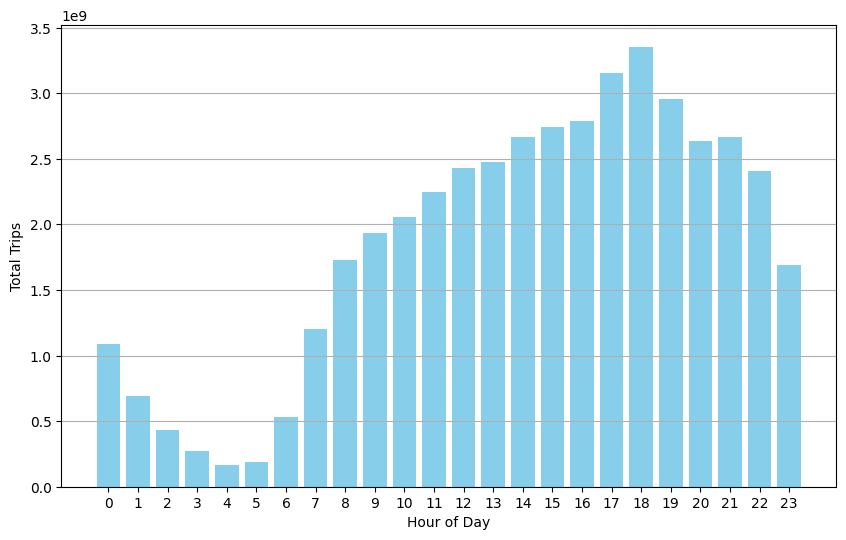

In [90]:
plt.figure(figsize=(10, 6))
plt.bar(df_trips_per_hour['pickup_hour'], df_trips_per_hour['trip_count'], color='skyblue')
plt.xlabel('Hour of Day')
plt.ylabel('Total Trips')
plt.xticks(range(0, 24))
plt.grid(axis='y')
plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [91]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
df_trips_per_hour['total_trips_scaled'] = (df_trips_per_hour['trip_count'] / sample_fraction).astype(int)
df_trips_per_hour.sort_values(by = 'total_trips_scaled',ascending = False).head()

pickup_hour  trip_count  total_trips_scaled
18           18  3355816871         67116337420
17           17  3158007897         63160157940
19           19  2959507950         59190159000
16           16  2789930386         55798607720
15           15  2742728104         54854562080

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [92]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_hour', 'Day_of_week',
       'month', 'quarter', 'trip_duration_hours', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry', 'trip_count',
       'route'],
      dtype='object')

In [93]:
# Compare traffic trends for the week days and weekends
# WEEKDAYS
df1 = df[df['Day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'])]
df_trips_weekdays = df1.groupby(by='pickup_hour')['trip_count'].sum().reset_index()
df_trips_weekdays.sort_values(by='trip_count', ascending=False)

pickup_hour  trip_count
18           18  2624898486
17           17  2422138077
19           19  2292133910
21           21  2096598716
16           16  2080427123
20           20  2063776851
15           15  2054226472
14           14  1982215133
22           22  1856070012
13           13  1798367056
12           12  1772847244
11           11  1660684362
9             9  1584158053
10           10  1570027279
8             8  1513286142
23           23  1227799422
7             7  1082769431
0             0   523861330
6             6   459570553
1             1   248357450
5             5   150443376
2             2   130504207
3             3    75032287
4             4    68916606

In [94]:
#weekends
df2 = df[df['Day_of_week'].isin(['Saturday', 'Sunday'])]
df_trips_weekends = df2.groupby(by='pickup_hour')['trip_count'].sum().reset_index()
df_trips_weekends.sort_values(by='trip_count', ascending=False)

pickup_hour  trip_count
17           17   735869820
18           18   730918385
16           16   709503263
15           15   688501632
14           14   685413480
13           13   681869013
19           19   667374040
12           12   658422211
11           11   589107675
20           20   569472244
0             0   567548535
21           21   567363997
22           22   554495966
10           10   490196719
23           23   464513720
1             1   444743599
9             9   352031918
2             2   305325667
8             8   212903039
3             3   197270147
7             7   121256770
4             4    98509755
6             6    71430788
5             5    41091924

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Ans - We can see from above patterns that evening hours are busy on both weekdays and weekends. But there is slight difference when it comes to timings 
when there are office hours on weekdays and outing hours on weekends.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [95]:
# Find top 10 pickup and dropoff zones
#Pickup
df_t10_pickup = df.groupby(by='PULocationID')['trip_count'].sum().reset_index()
print(df_t10_pickup.sort_values(by='trip_count', ascending=False).head(10))

#DROPOFF
df_t10_dropoff = df.groupby(by='DOLocationID')['trip_count'].sum().reset_index()
print(df_t10_dropoff.sort_values(by='trip_count', ascending=False).head(10))

     PULocationID  trip_count
196           237  4425043441
133           161  4285666225
195           236  3666786916
134           162  2589181456
117           142  2263285476
153           186  2262524356
189           230  1859765625
142           170  1743563536
135           163  1640088004
198           239  1571646736
     DOLocationID  trip_count
228           236  2596732357
229           237  2419590065
154           161  1865804557
135           142  1455797723
231           239  1428023143
134           141  1402210013
155           162  1392852909
163           170  1384609115
226           234  1179438559
156           163  1165154936


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [96]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_10 = df['PULocationID'].value_counts().rename('pickup')
dropoff_10 = df['DOLocationID'].value_counts().rename('dropoff')
ratio = pd.concat([pickup_10, dropoff_10], axis=1)
ratio['pickup_dropoff_ratio'] = ratio['pickup'] / ratio['dropoff']

#Top 10
print("Top 10 ratio")
print(ratio.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10))

#Bottom 10
print("Bottom 10 ratio")
print(ratio.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10))


Top 10 ratio
      pickup  dropoff  pickup_dropoff_ratio
70    2712.0    225.0             12.053333
215    118.0     40.0              2.950000
186  47566.0  27321.0              1.741005
132  18907.0  12304.0              1.536655
43   23424.0  16378.0              1.430211
114  19326.0  13522.0              1.429226
249  33069.0  23999.0              1.377932
162  50884.0  37296.0              1.364329
100  20592.0  15383.0              1.338621
161  65465.0  49807.0              1.314373
Bottom 10 ratio
     pickup  dropoff  pickup_dropoff_ratio
1      18.0   3763.0              0.004783
227     1.0     97.0              0.010309
20      1.0     81.0              0.012346
257     6.0    458.0              0.013100
91      1.0     73.0              0.013699
165     2.0    133.0              0.015038
14      8.0    531.0              0.015066
22      1.0     65.0              0.015385
71      1.0     65.0              0.015385
16      1.0     59.0              0.016949


**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [97]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount',
       'congestion_surcharge', 'airport_fee', 'pickup_hour', 'Day_of_week',
       'month', 'quarter', 'trip_duration_hours', 'OBJECTID', 'Shape_Leng',
       'Shape_Area', 'zone', 'LocationID', 'borough', 'geometry', 'trip_count',
       'route'],
      dtype='object')

In [98]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
df_night_shift_p = df.loc[df['pickup_hour'].isin([23, 0, 1, 2, 3, 4, 5, 6]), ['PULocationID', 'trip_count']].copy()
df_night_p = df_night_shift_p.groupby(by = 'PULocationID')['trip_count'].sum().reset_index()
print(df_night_p.sort_values(by = 'trip_count',ascending = False).head(10))


df_night_shift_d = df.loc[df['pickup_hour'].isin([23, 0, 1, 2, 3, 4, 5, 6]), ['DOLocationID', 'trip_count']].copy()
df_night_d = df_night_shift_d.groupby(by = 'DOLocationID')['trip_count'].sum().reset_index()
print(df_night_d.sort_values(by = 'trip_count',ascending = False).head(10))

     PULocationID  trip_count
50             79   434762055
161           249   348216570
116           186   319215426
28             48   308276640
103           161   304477715
146           230   267504375
89            142   206709030
153           237   202423403
104           162   199719700
40             68   179259880
     DOLocationID  trip_count
77             79   172223253
163           170   158497746
46             48   154836619
134           141   149174493
66             68   142842491
101           107   142171600
227           236   138995283
253           263   136674530
154           161   124752644
230           239   120371066


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [99]:
# Filter for night hours (11 PM to 5 AM)
df_night_revenue = df.loc[df['pickup_hour'].isin([23, 0, 1, 2, 3, 4, 5, 6]), ['total_amount']].copy()
df_day_revenue = df.loc[df['pickup_hour'].isin(range(6,23)), ['total_amount']].copy()
total_night_revenue = df_night_revenue['total_amount'].sum()
total_day_revenue = df_day_revenue['total_amount'].sum()
print(total_night_revenue,total_day_revenue)

4529694.3100000005 29716151.960000005


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [100]:
# Analyse the fare per mile per passenger for different passenger counts
df_fare_avg = df.groupby(by = 'passenger_count')[['total_amount','trip_distance']].mean()
df_fare_avg['fare/mile/passenger'] = (df.total_amount/df.trip_distance)/df.index
df_fare_avg

total_amount  trip_distance  fare/mile/passenger
passenger_count                                                  
1                   26.081774       2.736119             6.676056
2                   28.478530       3.174135             6.188679
3                   28.393922       3.091728             3.177215
4                   28.707103       3.120842             1.392016
5                   26.159121       2.803371             3.088889
6                   26.617701       2.850763             1.784173

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [101]:
# Compare the average fare per mile for different days and for different times of the day
df_fare_avg_day = df.groupby(by=['Day_of_week', 'pickup_hour'])[['total_amount', 'trip_distance']].mean()
df_fare_avg_day['fare_per_mile/day_hour'] = df_fare_avg_day['total_amount'] / df_fare_avg_day['trip_distance']
df_fare_avg_day


total_amount  trip_distance  fare_per_mile/day_hour
Day_of_week pickup_hour                                                     
Friday      0               26.066433       3.147628                8.281293
            1               25.196034       3.093157                8.145733
            2               24.712675       2.996595                8.246918
            3               27.183644       3.497551                7.772194
            4               40.474501       5.853783                6.914247
...                               ...            ...                     ...
Wednesday   19              26.521776       2.496341               10.624261
            20              24.934775       2.661729                9.367888
            21              25.534201       2.847115                8.968447
            22              26.047148       2.976105                8.752092
            23              26.695562       3.201135                8.339405

[168 rows x 3 columns]

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [102]:
# Compare fare per mile for different vendors
df_fare_avg_vendor = df.groupby(by=['VendorID', 'pickup_hour'])[['total_amount', 'trip_distance']].mean()
df_fare_avg_vendor['fare_per_mile/day_hour'] = df_fare_avg_vendor['total_amount'] / df_fare_avg_vendor['trip_distance']
df_fare_avg_vendor


total_amount  trip_distance  fare_per_mile/day_hour
VendorID pickup_hour                                                     
1        0               25.546457       3.012669                8.479677
         1               24.870331       2.981448                8.341696
         2               24.015688       2.870074                8.367620
         3               25.692650       3.182073                8.074187
         4               32.271868       4.488003                7.190697
         5               35.569661       5.120977                6.945874
         6               26.434000       3.529559                7.489320
         7               23.909900       2.838069                8.424708
         8               23.776022       2.573864                9.237483
         9               24.245511       2.560333                9.469672
         10              24.525976       2.556897                9.592088
         11              24.816126       2.527141                9.819843
         12              25.108685       2.560247                9.807132
         13              26.003055       2.736871                9.501016
         14              26.769764       2.842585                9.417402
         15              26.168430       2.685391                9.744738
         16              27.844865       2.666491               10.442510
         17              26.868875       2.514064               10.687428
         18              25.574774       2.381331               10.739697
         19              25.357928       2.496026               10.159322
         20              24.652268       2.644754                9.321195
         21              25.253829       2.818103                8.961286
         22              25.781082       2.942076                8.762887
         23              26.227633       3.091198                8.484617
2        0               26.605403       3.184552                8.354519
         1               25.318137       3.015140                8.397001
         2               24.950710       2.988498                8.348914
         3               26.345393       3.302627                7.977101
         4               35.399261       4.963757                7.131546
         5               39.531249       5.775105                6.845114
         6               29.979815       4.147788                7.227904
         7               25.646074       3.106735                8.254993
         8               25.034487       2.740578                9.134749
         9               25.515451       2.713948                9.401598
         10              25.744398       2.700483                9.533257
         11              26.197292       2.681301                9.770365
         12              26.824226       2.772237                9.676023
         13              27.364384       2.896927                9.446005
         14              28.142387       2.994788                9.397122
         15              27.774011       2.913580                9.532608
         16              29.590663       2.891242               10.234587
         17              28.053602       2.636008               10.642458
         18              26.706498       2.491851               10.717535
         19              26.174613       2.566517               10.198496
         20              25.614781       2.758694                9.285110
         21              25.918782       2.874213                9.017697
         22              26.496850       3.004111                8.820197
         23              27.182083       3.194983                8.507738

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [103]:
# Defining distance tiers
df_tier_0_2 = df[df.trip_distance <= 2]
df_tier_2_5 = df[(df.trip_distance > 2) & (df.trip_distance <= 5)]
df_tier_5_A = df[df.trip_distance > 5]

df_tier_0_2_avg = df_tier_0_2.groupby(by = 'VendorID')[['total_amount', 'trip_distance']].mean()
df_tier_0_2_avg['avg_0_2'] = df_tier_0_2_avg['total_amount'] / df_tier_0_2_avg['trip_distance']

df_tier_2_5_avg = df_tier_2_5.groupby(by = 'VendorID')[['total_amount', 'trip_distance']].mean()
df_tier_2_5_avg['avg_2_5'] = df_tier_2_5_avg['total_amount'] / df_tier_2_5_avg['trip_distance']

df_tier_5_A_avg = df_tier_5_A.groupby(by = 'VendorID')[['total_amount', 'trip_distance']].mean()
df_tier_5_A_avg['avg_5_A'] = df_tier_5_A_avg['total_amount'] /df_tier_5_A_avg['trip_distance']

df_tiered_avg_vendor = pd.merge(df_tier_0_2_avg[['avg_0_2']],
                                df_tier_2_5_avg[['avg_2_5']],
                                left_index=True, right_index=True)

df_tiered_avg_vendor = pd.merge(df_tiered_avg_vendor,
                                df_tier_5_A_avg[['avg_5_A']],
                                left_index=True, right_index=True)

df_tiered_avg_vendor

avg_0_2   avg_2_5   avg_5_A
VendorID                               
1         14.647581  9.262278  6.191922
2         14.751045  9.517521  6.260556

##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [104]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
df_tip_passenger = df.groupby('passenger_count')[['tip_amount', 'total_amount']].mean()
df_tip_passenger['tip_percent'] = (df_tip_passenger['tip_amount'] / df_tip_passenger['total_amount']) * 100
df_tip_passenger = df_tip_passenger.round(2)
df_tip_passenger


tip_amount  total_amount  tip_percent
passenger_count                                       
1                      4.05         26.08        15.53
2                      4.43         28.48        15.54
3                      4.41         28.39        15.54
4                      4.49         28.71        15.64
5                      4.06         26.16        15.51
6                      4.16         26.62        15.63

In [105]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
df_tip_trip = df.groupby('trip_distance')[['tip_amount', 'total_amount']].mean()
df_tip_trip['tip_percent'] = (df_tip_trip['tip_amount'] / df_tip_trip['total_amount']) * 100
df_tip_trip = df_tip_trip.round(2)
df_tip_trip.sort_values(by = 'tip_percent', ascending = False)

tip_amount  total_amount  tip_percent
trip_distance                                       
23.82               95.00        193.15        49.18
24.95               54.10        172.05        31.44
24.66               41.00        144.80        28.31
26.56               43.23        169.71        25.47
44.09               83.31        353.06        23.60
...                   ...           ...          ...
27.67                0.01        124.46         0.01
53.13                0.02        210.02         0.01
25.15                0.01        140.25         0.01
44.30                0.01        260.70         0.00
35.71                0.01        211.71         0.00

[3082 rows x 3 columns]

In [106]:
df_tip_pickup_hour = df.groupby('pickup_hour')[['tip_amount', 'total_amount']].mean()
df_tip_pickup_hour['tip_percent'] = (df_tip_pickup_hour['tip_amount'] / df_tip_pickup_hour['total_amount']) * 100
df_tip_pickup_hour = df_tip_pickup_hour.round(2)
df_tip_pickup_hour

tip_amount  total_amount  tip_percent
pickup_hour                                       
0                  4.03         26.36        15.29
1                  3.86         25.22        15.29
2                  3.80         24.73        15.36
3                  4.02         26.20        15.35
4                  5.46         34.69        15.75
5                  5.93         38.49        15.40
6                  4.44         28.96        15.34
7                  3.86         25.15        15.35
8                  3.80         24.68        15.42
9                  3.94         25.16        15.64
10                 4.01         25.41        15.77
11                 4.08         25.82        15.80
12                 4.16         26.36        15.78
13                 4.26         26.99        15.77
14                 4.36         27.77        15.71
15                 4.28         27.34        15.64
16                 4.51         29.12        15.50
17                 4.27         27.74        15.40
18                 4.07         26.41        15.39
19                 3.98         25.97        15.32
20                 3.93         25.38        15.50
21                 4.00         25.76        15.54
22                 4.08         26.33        15.49
23                 4.15         26.96        15.40

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours.

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [107]:
# See how passenger count varies across hours and days
df_passenger_time = df.groupby(['Day_of_week', 'pickup_hour', 'passenger_count']).size().reset_index(name='trip_count')
df_passenger_time.sort_values(by = 'trip_count')

Day_of_week  pickup_hour  passenger_count  trip_count
746     Tuesday            4                4           1
161      Monday            2                6           2
610    Thursday            5                5           3
736     Tuesday            2                6           3
747     Tuesday            4                5           3
..          ...          ...              ...         ...
965   Wednesday           17                1       11411
977   Wednesday           19                1       11446
827     Tuesday           18                1       12131
684    Thursday           18                1       12678
971   Wednesday           18                1       12824

[1007 rows x 4 columns]

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [108]:
# How does passenger count vary across zones
df_passenger_zones = df.groupby(by = ['zone','passenger_count']).size().reset_index(name='trip_count')
df_passenger_zones


zone  passenger_count  trip_count
0     Alphabet City                1        1004
1     Alphabet City                2         223
2     Alphabet City                3          75
3     Alphabet City                4          28
4     Alphabet City                5          22
..              ...              ...         ...
790  Yorkville West                2        3617
791  Yorkville West                3         807
792  Yorkville West                4         328
793  Yorkville West                5         435
794  Yorkville West                6         228

[795 rows x 3 columns]

In [109]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.

avg_passenger_zone  = df.groupby('PULocationID')['passenger_count'].mean().reset_index()
avg_passenger_zone.rename(columns={'passenger_count': 'avg_passenger_count'}, inplace=True)
zones = zones.merge(avg_passenger_zone, how='left', left_on='LocationID', right_on='PULocationID')
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  PULocationID  avg_passenger_count  
0          18           1.0             1.333333  
1           2           2.0             1.000000  
2           0           NaN                  NaN  
3        1364           4.0             1.443548  
4           0           NaN                  NaN

Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [110]:
# How often is each surcharge applied?
pickup_extra_zone = df.groupby('zone')['extra'].mean().sort_values(ascending=False).reset_index()
pickup_extra_zone.columns = ['zone', 'avg_extra_charge']
pickup_extra_zone


zone  avg_extra_charge
0           LaGuardia Airport          6.032645
1                North Corona          5.000000
2               Rikers Island          3.000000
3               East Elmhurst          2.663060
4               College Point          2.500000
..                        ...               ...
216              Saint Albans          0.000000
217     Van Cortlandt Village          0.000000
218  Williamsbridge/Olinville          0.000000
219               Westerleigh          0.000000
220             Willets Point          0.000000

[221 rows x 2 columns]

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

1) 4-7 pm are peak hours so we should keep most cabs ready during these hours.
2) Tuesday - Saturday are peak days, hence more cabs needed.
3) Slow speed areas can be due to high traffics, 
so increasing the number of taxis in peak hours is not advisable as this might lead to less revenue and occupancy of the taxis for longer durations.


**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

1) The top 10 pickup and dropoff locations seem to be same, so we can infer that some of the roads are taken very often. Hence cabs availability should be higher on that roads.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

1) Since most revenue is generated by the passenger count being 1 or 2. So we can formulate a strategy where we offer, cabs for single or double people only.
2) Weekdays should have large number of cabs on road, so that maximum revenue is generated.

